# Signal

In this notebook we are going to evaluate and assess the signal quality of the electronic equipment, namely the signal quality of the digital signal synthesizer and the amplification thereof.

In [17]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## Synthesizer

In [18]:
source_h = pd.read_hdf('../dataset/signal/source.h5', 'horizontal')
source_h = source_h[(source_h.time > 0) & (source_h.time < 10e-6)]

source_v = pd.read_hdf('../dataset/signal/source.h5', 'vertical')
source_v = source_v[(source_v.time > 0) & (source_v.time < 10e-6)]

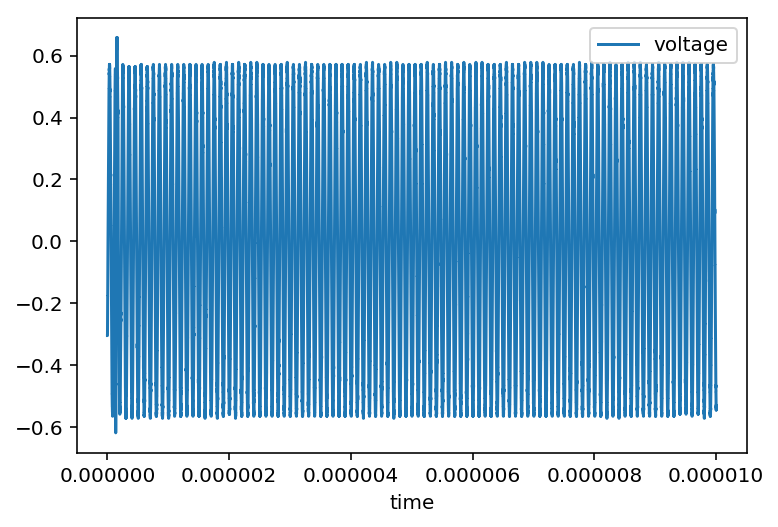

In [19]:
source_h.plot('time', 'voltage')

/Users/bodokaiser/.pyenv/versions/3.6.5/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


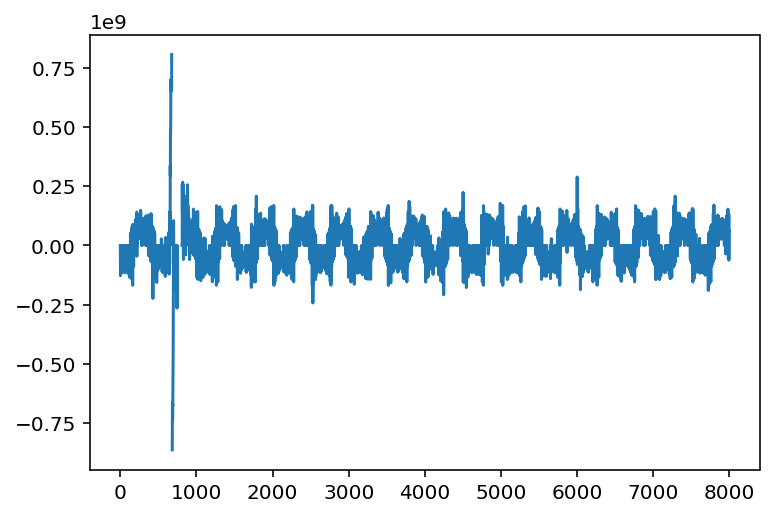

In [87]:
plt.plot(np.gradient(np.arccos(source_h.voltage / .6), source_h.time)[:8000])

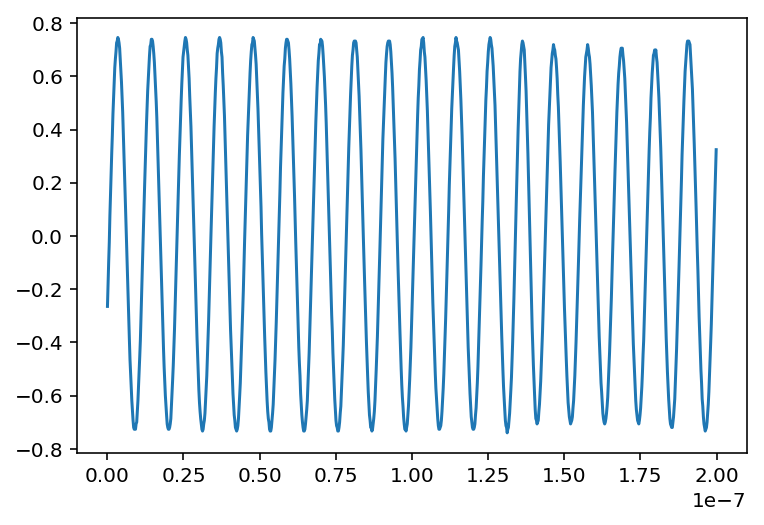

In [73]:
U = source_v.voltage[0:1000]
t = source_v.time[0:1000]

plt.plot(t, U)

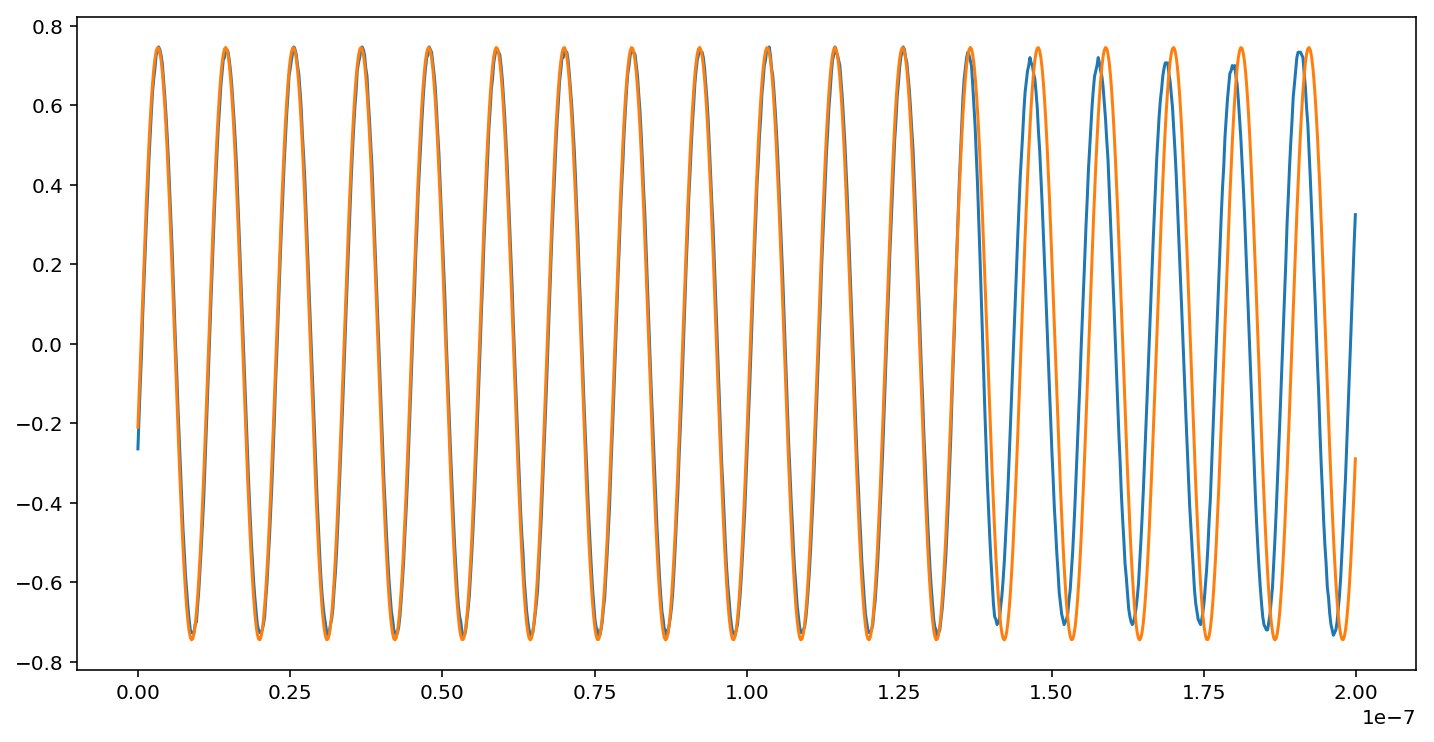

In [85]:
def signal(t):
    return .745*np.cos(2*np.pi*90e6*t-.6*np.pi)

plt.figure(figsize=(12, 6))
plt.plot(t, U)
plt.plot(t, signal(t))